# Making Prediction

In [53]:
import torch as torch
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# Weight
w = torch.tensor(3.0, requires_grad=True)
# Bias
b = torch.tensor(1.0, requires_grad=True)

In [55]:
def forward(x):
    y = w*x+b
    return y

In [56]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [57]:
x = torch.tensor([[2],[2]])
forward(x)

tensor([[7.],
        [7.]], grad_fn=<AddBackward0>)

# Linear Class

In [58]:
from torch.nn import Linear

In [59]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [60]:
x = torch.tensor([2.0])
model(x)

tensor([0.5891], grad_fn=<AddBackward0>)

In [61]:
x = torch.tensor([[2.0], [4.0]])
model(x)

tensor([[0.5891],
        [1.6197]], grad_fn=<AddmmBackward>)

# Create Dataset

Text(0, 0.5, 'y')

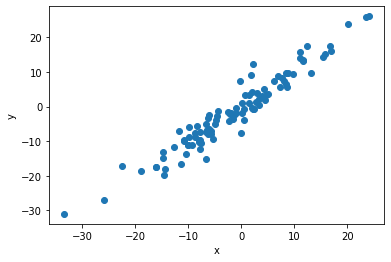

In [62]:
x = torch.randn(100,1)*10
y = x + 3* torch.randn(100, 1)
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')

# Custom Modules

In [63]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [64]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [65]:
model.forward(torch.tensor([1.0]))

tensor([0.0739], grad_fn=<AddBackward0>)

In [66]:
model.forward(torch.tensor([[1.0],[2.0]]))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [67]:
[w, b] = model.parameters()

def get_param():
    return w[0][0].item(), b[0].item()

In [68]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_param()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(x, y)
    plt.show()

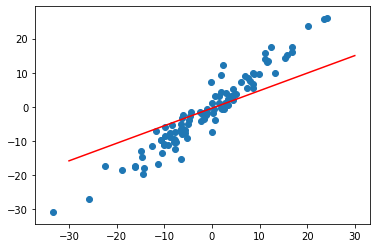

In [69]:
plot_fit('Initial Param')

# Loss Function:

y = wx + b

loss (or) cost = (y -(wx+b))^2 

b = 0 [Initialize bandwith value is 0 means, line start from center point]

loss = (y - wx)^2

Reduce the loss based on the weight value.

How to find the best initial weight value?

# Gradient Descendent

w0 = -1.5

loss = (3 - (-1.5 * -3))^2 = 2.25

Derivative of Loss = f'(w) = 18 * (w0 + 1)

                   = 18 * (-1.5 + 1) = -9
                   
                w1 = w0 - alpha f'(w)
                
                   = -1.5 - 0.01f'(w)
                   
                   = -1.5 - 0.01 * (-9)
                   
                   = -1.41

# Mean Square Error

f(m, b) = 1/N summation(yi - (mxi+b))^2

# Training:

In [70]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [71]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print('Epoch: ', i, 'Loss: ', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:  0 Loss:  36.448333740234375
Epoch:  1 Loss:  43.94552230834961
Epoch:  2 Loss:  53.461822509765625
Epoch:  3 Loss:  65.54043579101562
Epoch:  4 Loss:  80.87055969238281
Epoch:  5 Loss:  100.32704162597656
Epoch:  6 Loss:  125.01991271972656
Epoch:  7 Loss:  156.35794067382812
Epoch:  8 Loss:  196.12892150878906
Epoch:  9 Loss:  246.60169982910156
Epoch:  10 Loss:  310.65545654296875
Epoch:  11 Loss:  391.9438781738281
Epoch:  12 Loss:  495.1044006347656
Epoch:  13 Loss:  626.0213623046875
Epoch:  14 Loss:  792.162353515625
Epoch:  15 Loss:  1003.0047607421875
Epoch:  16 Loss:  1270.5738525390625
Epoch:  17 Loss:  1610.131591796875
Epoch:  18 Loss:  2041.0474853515625
Epoch:  19 Loss:  2587.8994140625
Epoch:  20 Loss:  3281.8857421875
Epoch:  21 Loss:  4162.58251953125
Epoch:  22 Loss:  5280.22802734375
Epoch:  23 Loss:  6698.5732421875
Epoch:  24 Loss:  8498.5078125
Epoch:  25 Loss:  10782.728515625
Epoch:  26 Loss:  13681.5
Epoch:  27 Loss:  17360.189453125
Epoch:  28 Loss:  2

Text(0, 0.5, 'Loss')

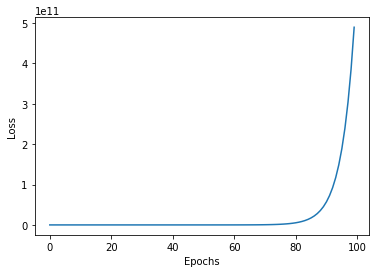

In [73]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')